# 카메라 스티커앱 만들기 첫걸음

# Step1. 사진 준비하기
먼저 필요한 라이브러리들을 불러옵니다.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

준비한 이미지를 불러옵니다

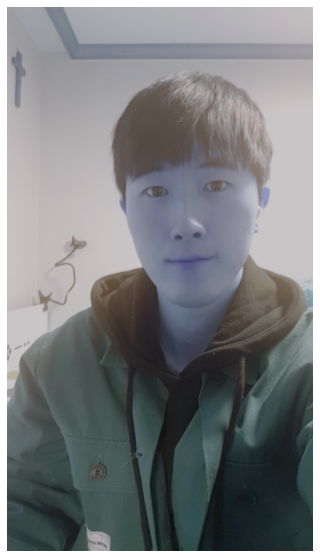

In [ ]:
image_path = '/content/drive/MyDrive/Exploration_Data/ex7/sample.jpg'
img_bgr = cv2.imread(image_path)   
img_original = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img_bgr)
plt.show()

사진에 푸른빛이도는것은 opencv가 RGB가 아니라 BGR을 사용하기 때문입니다. 그래서 opencv에서 다룬 이미지를 다른 이미지 라이브러리에서 출력하려면 색깔 보정처리를 해줘야합니다.

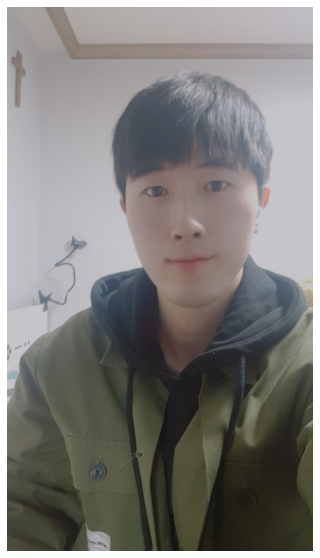

In [ ]:
# BGR --> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img_rgb)
plt.show()

# Step2. 얼굴 검출
dlib의 face detector는 HOG와 SVM을 이용해서 얼굴을 찾아줍니다. 그럼 dlib를 활용해 detector를 선언해 보겠습니다.

In [ ]:
detector = dlib.get_frontal_face_detector()

detector를 이용해서 얼굴의 bounding box를 추출해봅시다.

In [ ]:
face_box = detector(img_rgb, 1)
print("face_box 타입 : ",type(face_box))
print(face_box)

face_box 타입 :  <class '_dlib_pybind11.rectangles'>
rectangles[[(241, 348) (562, 669)]]


detector의 두번째 인자는 이미지 피라미드의 수입니다. 이를 통해 upsampling을 합니다.
그리고 detector는 rectangles객체를 반환하고, 이 배열은 순서대로 bounding box의 left,top,right,bottom의 좌표를 의미합니다.

찾은 얼굴을 한번 출력해봅시다.

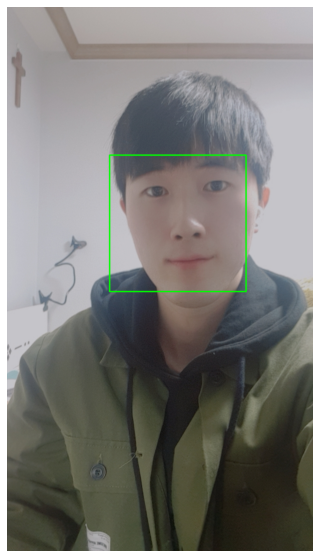

In [ ]:
for rectangle in face_box:
    l = rectangle.left()
    t = rectangle.top()
    r = rectangle.right()
    b = rectangle.bottom()

    cv2.rectangle(img_original, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_original_rgb =  cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img_original_rgb)
plt.show()

# Step3. 랜드마크 표시
bounding box 내부에서 이목구비의 위치를 찾아봅시다. 

여기서는 Dlib에서 제공하는 미리학습된 랜드마크 모델을 사용해보겠습니다. 

In [ ]:
model_path = '/content/drive/MyDrive/Exploration_Data/ex7/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print(landmark_predictor)

불러온 모델을 활용해서 bounding box안에서 랜드마크를 찾고, 각 랜드마크의 좌표를 list_points에 저장합니다.

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for rectangle in face_box:
    points = landmark_predictor(img_rgb, rectangle)
    
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print("랜드마크 수 :",len(list_landmarks[0]))
print("list_landmarks :",list_landmarks[0])

랜드마크 수 : 68
list_landmarks : [(282, 437), (284, 478), (291, 520), (302, 561), (315, 601), (334, 637), (359, 668), (392, 689), (436, 694), (482, 686), (523, 664), (556, 633), (581, 593), (596, 549), (603, 503), (604, 456), (603, 410), (295, 407), (308, 384), (334, 378), (362, 381), (387, 395), (429, 388), (457, 368), (489, 360), (522, 362), (549, 381), (410, 428), (409, 459), (409, 489), (408, 520), (384, 542), (400, 547), (417, 550), (436, 544), (454, 537), (325, 439), (340, 427), (360, 426), (378, 439), (361, 444), (341, 446), (460, 430), (478, 414), (499, 412), (517, 419), (502, 430), (481, 432), (375, 600), (393, 592), (408, 584), (421, 587), (437, 581), (459, 585), (485, 591), (463, 607), (442, 617), (425, 620), (411, 620), (394, 614), (385, 600), (409, 598), (422, 598), (438, 595), (474, 592), (439, 598), (423, 601), (410, 600)]


이렇게 찾은 랜드마크를 이미지에 출력해봅시다.

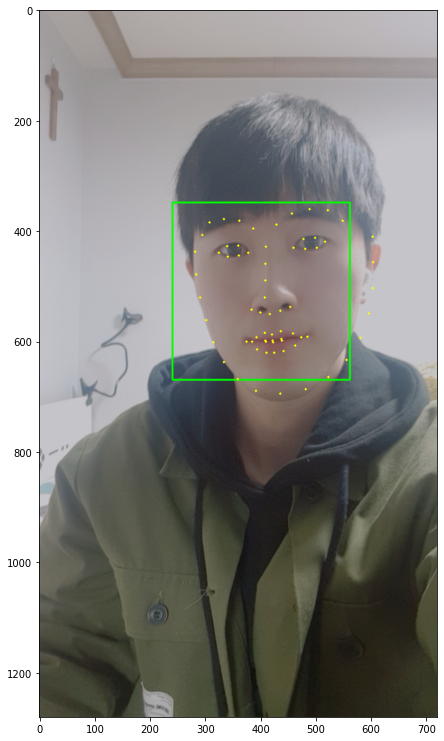

In [ ]:
for points in list_landmarks:
    for point in points:
        cv2.circle(img_original, point, 2, (0, 255, 255), -1)

img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(13,13))

plt.imshow(img_original_rgb)
plt.show()

# Step4. 스티커 적용 위치 확인하기
이제 스티커를 씌울 준비가되었습니다. 고양이수염스티커이기때문에 코중앙에 위차하는게 좋겠습니다.랜드마크 기준으로 30번정도에 씌우면 될것같습니다.



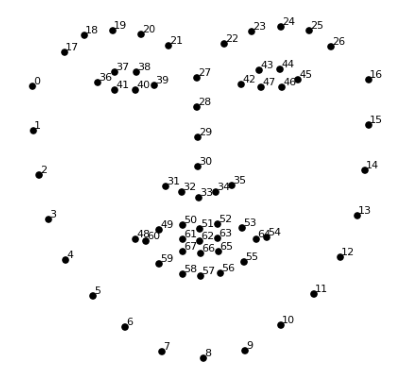

In [ ]:
# ibug 300w 데이터셋은 68개를 사용합니다.
path = '/content/drive/MyDrive/Exploration_Data/ex7/landmark.png'
land_loc = cv2.imread(path)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(land_loc)
plt.show()

랜드마크30번의 좌표를 출력해봅시다.

In [ ]:
for rectangle, landmark in zip(face_box, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = rectangle.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (408,520)
(w,h) : (322,322)


# Step5. 스티커 적용하기
준비해둔 고양이 수염 스티커이미지를 불러옵시다.

In [ ]:
sticker_path = '/content/drive/MyDrive/Exploration_Data/ex7/cat-whiskers.png'
sticker = cv2.imread(sticker_path)
sticker = cv2.resize(sticker, (w,h)) # 스티커를 원본 이미지에 맞게 크기를 변경해줍니다.
print(sticker.shape)

(322, 322, 3)


스티커이미지의 시작점은 box의 top - left이기때문에, x,y좌표를 수정합니다.

In [ ]:
refined_x = x - w // 2
refined_y = y - h // 2

사진을 벗어난 스티커부분을 예외처리해줍시다.

In [ ]:
if refined_x < 0: 
    sticker = sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    sticker = sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (247,359)


벗어난 부분을 없어보입니다.

이제 원본이미지에 스티커를 적용해봅시다.

In [ ]:
sticker_area = img_original[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
img_original[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    np.where(sticker==255,sticker_area,sticker).astype(np.uint8)

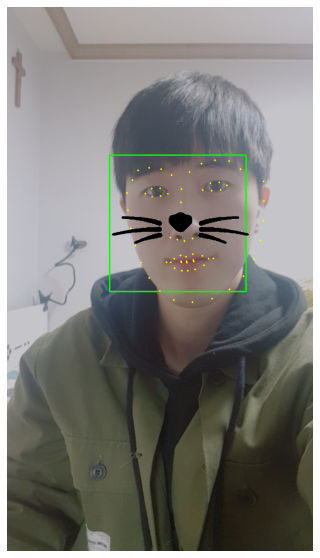

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

bounding box와 landmark를 제거하고 최종결과만 출력해 봅시다.

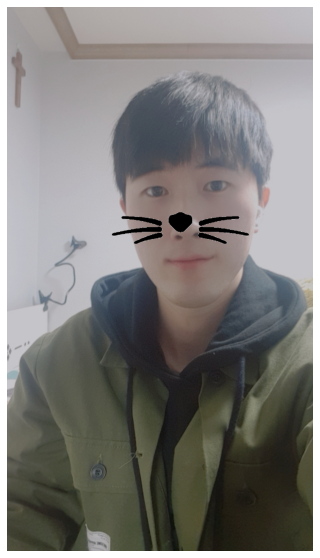

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
img_bgr[refined_y:refined_y +sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    np.where(sticker==255,sticker_area,sticker).astype(np.uint8)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Step6. 문제점 찾아보기
다양한 사진에도 적용을 해봅시다.
# sample1

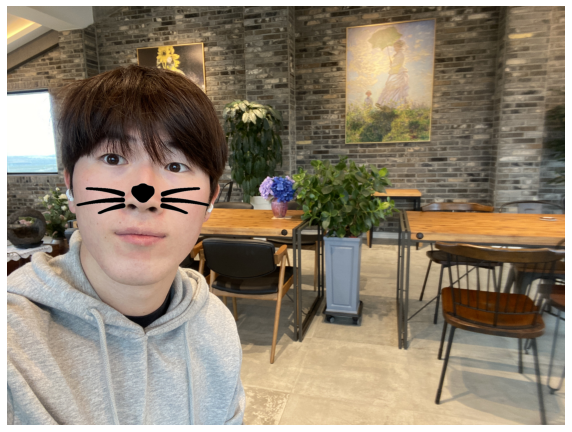

In [ ]:
path1 = '/content/drive/MyDrive/Exploration_Data/ex7/sample1.JPG'
img_sample1 = cv2.imread(path1)

# bounding box 검출
face_box1 = detector(img_sample1, 1)

for rectangle in face_box1:
    l = rectangle.left()
    t = rectangle.top()
    r = rectangle.right()
    b = rectangle.bottom()

# 랜드마크 표시
list_landmarks1 = []

for rectangle in face_box1:
    points1 = landmark_predictor(img_sample1, rectangle)
    
    list_points1 = list(map(lambda p: (p.x, p.y), points1.parts()))
    list_landmarks1.append(list_points1)

for rectangle, landmark in zip(face_box1, list_landmarks1):
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = rectangle.width()

# 스티커 적용
sticker_path = '/content/drive/MyDrive/Exploration_Data/ex7/cat-whiskers.png'
sticker1 = cv2.imread(sticker_path)
sticker1 = cv2.resize(sticker1, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    sticker1 = sticker1[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    sticker1 = sticker1[-refined_y:, :]
    refined_y = 0

sticker_area = img_sample1[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]]
img_sample1[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]] = \
    np.where(sticker1==255,sticker_area,sticker1).astype(np.uint8)

img_sample1_rgb = cv2.cvtColor(img_sample1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_sample1_rgb)
plt.axis('off')
plt.show()


# sample2

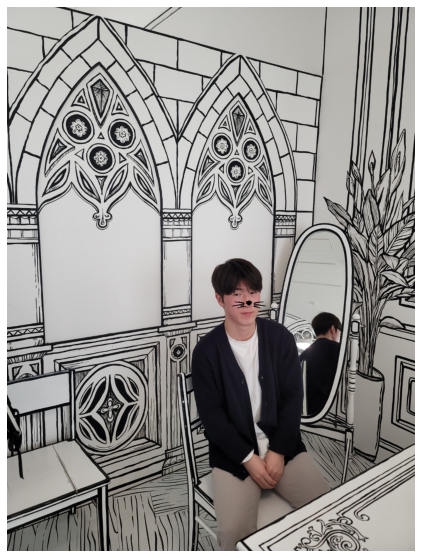

In [ ]:
path1 = '/content/drive/MyDrive/Exploration_Data/ex7/sample2.JPG'
img_sample2 = cv2.imread(path1)

# bounding box 검출
face_box1 = detector(img_sample2, 1)

for rectangle in face_box1:
    l = rectangle.left()
    t = rectangle.top()
    r = rectangle.right()
    b = rectangle.bottom()

# 랜드마크 표시
list_landmarks1 = []

for rectangle in face_box1:
    points1 = landmark_predictor(img_sample2, rectangle)
    
    list_points1 = list(map(lambda p: (p.x, p.y), points1.parts()))
    list_landmarks1.append(list_points1)

for rectangle, landmark in zip(face_box1, list_landmarks1):
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = rectangle.width()

# 스티커 적용
sticker_path = '/content/drive/MyDrive/Exploration_Data/ex7/cat-whiskers.png'
sticker1 = cv2.imread(sticker_path)
sticker1 = cv2.resize(sticker1, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    sticker1 = sticker1[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    sticker1 = sticker1[-refined_y:, :]
    refined_y = 0

sticker_area = img_sample2[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]]
img_sample2[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]] = \
    np.where(sticker1==255,sticker_area,sticker1).astype(np.uint8)

img_sample2_rgb = cv2.cvtColor(img_sample2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_sample2_rgb)
plt.axis('off')
plt.show()


멀리있어도 적용이 잘되는것을 확인할 수 있습니다.

# sample3

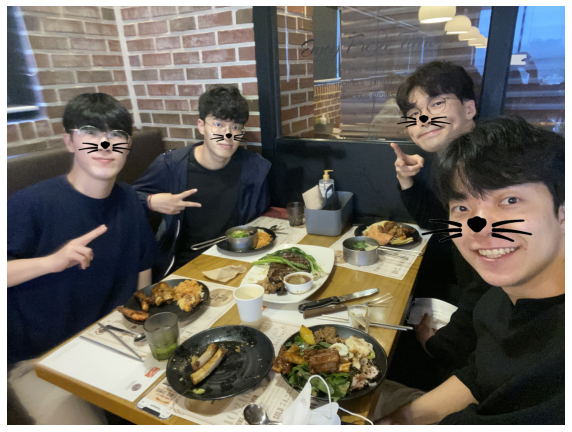

In [ ]:
path1 = '/content/drive/MyDrive/Exploration_Data/ex7/sample3.JPG'
img_sample3 = cv2.imread(path1)

# bounding box 검출
face_box1 = detector(img_sample3, 1)

# 랜드마크 표시
list_landmarks1 = []

for rectangle in face_box1:
    points1 = landmark_predictor(img_sample3, rectangle)
    
    list_points1 = list(map(lambda p: (p.x, p.y), points1.parts()))
    list_landmarks1.append(list_points1)

for rectangle, landmark in zip(face_box1, list_landmarks1):
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = rectangle.width()

# 스티커 적용
    sticker_path = '/content/drive/MyDrive/Exploration_Data/ex7/cat-whiskers.png'
    sticker1 = cv2.imread(sticker_path)
    sticker1 = cv2.resize(sticker1, (w,h))

    refined_x = x - w // 2
    refined_y = y - h // 2

    if refined_x < 0: 
        sticker1 = sticker1[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        sticker1 = sticker1[-refined_y:, :]
        refined_y = 0

    sticker_area = img_sample3[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]]
    img_sample3[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]] = \
        np.where(sticker1==255,sticker_area,sticker1).astype(np.uint8)

img_sample3_rgb = cv2.cvtColor(img_sample3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_sample3_rgb)
plt.axis('off')
plt.show()


여러명일때도 잘 작동하는것을 볼 수 있습니다. 다만 얼굴 각도에따른 스티커의 각도변화도 있으면 좋겠네요
# sample4

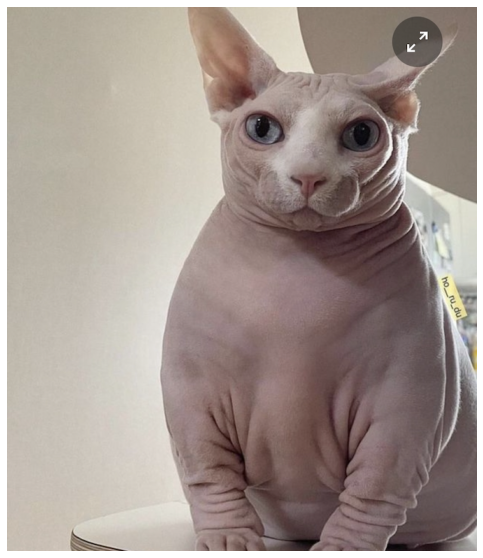

In [ ]:
path1 = '/content/drive/MyDrive/Exploration_Data/ex7/sample4.png'
img_sample4 = cv2.imread(path1)

# bounding box 검출
face_box1 = detector(img_sample4, 1)

# 랜드마크 표시
list_landmarks1 = []

for rectangle in face_box1:
    points1 = landmark_predictor(img_sample4, rectangle)
    
    list_points1 = list(map(lambda p: (p.x, p.y), points1.parts()))
    list_landmarks1.append(list_points1)

for rectangle, landmark in zip(face_box1, list_landmarks1):
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = rectangle.width()

# 스티커 적용
    sticker_path = '/content/drive/MyDrive/Exploration_Data/ex7/cat-whiskers.png'
    sticker1 = cv2.imread(sticker_path)
    sticker1 = cv2.resize(sticker1, (w,h))

    refined_x = x - w // 2
    refined_y = y - h // 2

    if refined_x < 0: 
        sticker1 = sticker1[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        sticker1 = sticker1[-refined_y:, :]
        refined_y = 0

    sticker_area = img_sample4[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]]
    img_sample4[refined_y:refined_y+sticker1.shape[0], refined_x:refined_x+sticker1.shape[1]] = \
        np.where(sticker1==255,sticker_area,sticker1).astype(np.uint8)

img_sample4_rgb = cv2.cvtColor(img_sample4, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_sample4_rgb)
plt.axis('off')
plt.show()


사람이아닌 고양이에다가해도 될까했는데 역시나 안되네요. 고양이 수염을 붙여주고싶었는데

# 회고 
사람이미지에다가 스티커를 씌우는 작업을해보았는데, 이렇게 실제 내가 나오는 사진으로 작업을해본것이 처음이어서 꽤 재밌는 익스플러레이션이었다. dlib의 face detector을 이용해 얼굴을 찾아보고 landmark_predictor로 얼굴에 랜드마크를 표시해보고, 스티커도 씌워보는등, 평소에 카메라 어플에서 사용했던 기능들을 단계별로 실행해보니 카메라 어플의 작동원리를 좀 더 잘 이해한느낌이다. 처음엔 정면사진을 이용해서 스티커를 씌워봤지만, 다른 샘플을 이용해서도 똑같은 작업을 해보았다. 멀리있는 사진, 여러명이있는사진, 동물사진 등을 해봤다. 결과적으로 동물이아닌 사람의 얼굴이기만하면 다 작동되는것같다. 